In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv('/Users/mahinbindra/Downloads/conversion_data.csv')

In [13]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [16]:
df2 = df.copy()

In [19]:
numeric_columns = df2.select_dtypes(include=['int', 'float'])

# Filter for rows with negative values in any numeric column
negative_rows = df2[(numeric_columns < 0).any(axis=1)]

negative_rows

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
17,17,18,South America,facebook,F,4,1,0,-2,5,...,60,24,35,31,7,5,6,4,2,1
34,34,35,South America,organic,F,0,0,3,-2,5,...,39,32,60,53,1,7,2,5,7,1
35,35,36,South America,google,M,4,3,4,4,-3,...,30,56,44,41,2,6,2,3,3,1
78,78,79,Asia,facebook,F,4,4,5,5,-1,...,26,26,43,38,6,1,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,1948,1949,Europe,youtube,F,5,3,4,-2,3,...,23,28,48,38,6,7,3,5,7,1
1956,1956,1957,Australia,youtube,M,3,1,2,-1,4,...,33,57,47,54,2,1,1,2,3,1
1965,1965,1966,Europe,google,M,4,5,5,-1,5,...,34,55,49,60,4,5,4,4,3,1
1971,1971,1972,North America,organic,F,5,5,4,-2,5,...,54,46,58,42,4,2,7,2,5,1


In [25]:
columns_with_negatives = numeric_columns.columns[(numeric_columns < 0).any()]
columns_with_negatives

Index(['product_views_Thu', 'product_views_Fri'], dtype='object')

In [21]:
column_averages = numeric_columns.mean()

In [22]:
column_averages

Unnamed: 0            999.500000
visitor_id           1000.500000
product_views_Mon       2.541500
product_views_Tue       2.440500
product_views_Wed       2.441000
product_views_Thu       2.256500
product_views_Fri       2.354000
avg_rating_Mon          3.023990
avg_rating_Tue          3.042760
avg_rating_Wed          2.970885
avg_rating_Thu          3.026555
avg_rating_Fri          2.989325
avg_price_Mon          59.382965
avg_price_Tue          59.652445
avg_price_Wed          60.557430
avg_price_Thu          60.168965
avg_price_Fri          60.690885
time_on_site_Mon       39.783500
time_on_site_Tue       39.776500
time_on_site_Wed       40.155500
time_on_site_Thu       40.417000
time_on_site_Fri       40.028500
pages_visited_Mon       3.946000
pages_visited_Tue       4.071000
pages_visited_Wed       4.092500
pages_visited_Thu       3.921000
pages_visited_Fri       4.089500
converted_Fri           0.372000
dtype: float64

In [26]:
target_columns = ['product_views_Thu', 'product_views_Fri']

In [28]:
column_average = df2[target_columns].mean()
column_average

product_views_Thu    2.2565
product_views_Fri    2.3540
dtype: float64

In [30]:
for col in target_columns:
    df2.loc[df2[col] < 0, col] = column_average[col]

In [31]:
df2.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1.0000,2.0,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1.0000,5.0,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,2.2565,5.0,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5.0000,0.0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2.0000,3.0,...,54,30,47,57,6,6,5,2,4,1


In [33]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [35]:
df2.groupby('converted_Fri').count()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri
converted_Fri,,,,,,,,,,,,,,,,,,,,,
0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,744,744,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744


In [36]:
df2['converted_Fri'].value_counts()

converted_Fri
0    1256
1     744
Name: count, dtype: int64

In [37]:
df2.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

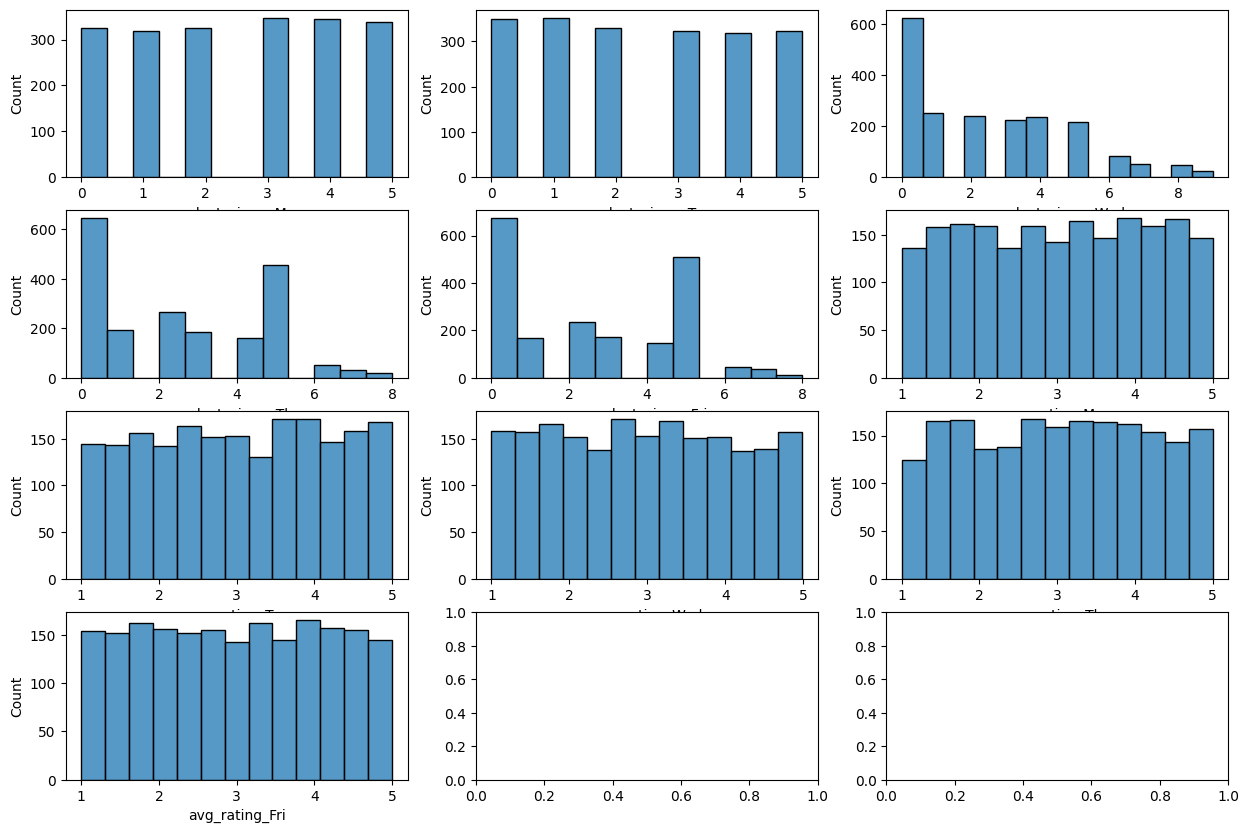

In [38]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
plt1 = sns.histplot(df2['product_views_Mon'], ax = axs[0,0])
plt2 = sns.histplot(df2['product_views_Tue'], ax = axs[0,1])
plt3 = sns.histplot(df2['product_views_Wed'], ax = axs[0,2])
plt4 = sns.histplot(df2['product_views_Thu'], ax = axs[1,0])
plt5 = sns.histplot(df2['product_views_Fri'], ax = axs[1,1])
plt6 = sns.histplot(df2['avg_rating_Mon'], ax = axs[1,2])
plt7 = sns.histplot(df2['avg_rating_Tue'], ax = axs[2,0])
plt8 = sns.histplot(df2['avg_rating_Wed'], ax = axs[2,1])
plt9 = sns.histplot(df2['avg_rating_Thu'], ax = axs[2,2])
plt10 = sns.histplot(df2['avg_rating_Fri'], ax = axs[3,0])

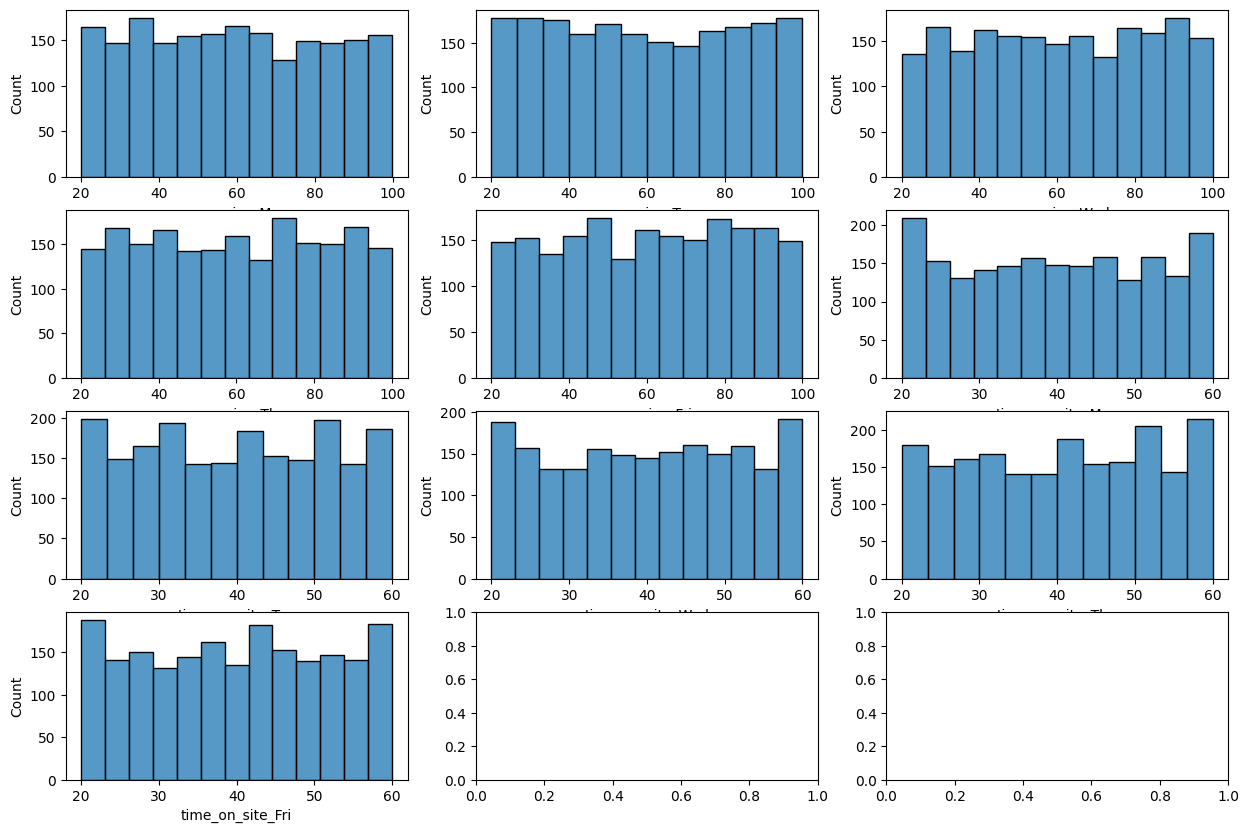

In [39]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
plt1 = sns.histplot(df2['avg_price_Mon'], ax = axs[0,0])
plt2 = sns.histplot(df2['avg_price_Tue'], ax = axs[0,1])
plt3 = sns.histplot(df2['avg_price_Wed'], ax = axs[0,2])
plt4 = sns.histplot(df2['avg_price_Thu'], ax = axs[1,0])
plt5 = sns.histplot(df2['avg_price_Fri'], ax = axs[1,1])
plt6 = sns.histplot(df2['time_on_site_Mon'], ax = axs[1,2])
plt7 = sns.histplot(df2['time_on_site_Tue'], ax = axs[2,0])
plt8 = sns.histplot(df2['time_on_site_Wed'], ax = axs[2,1])
plt9 = sns.histplot(df2['time_on_site_Thu'], ax = axs[2,2])
plt10 = sns.histplot(df2['time_on_site_Fri'], ax = axs[3,0])

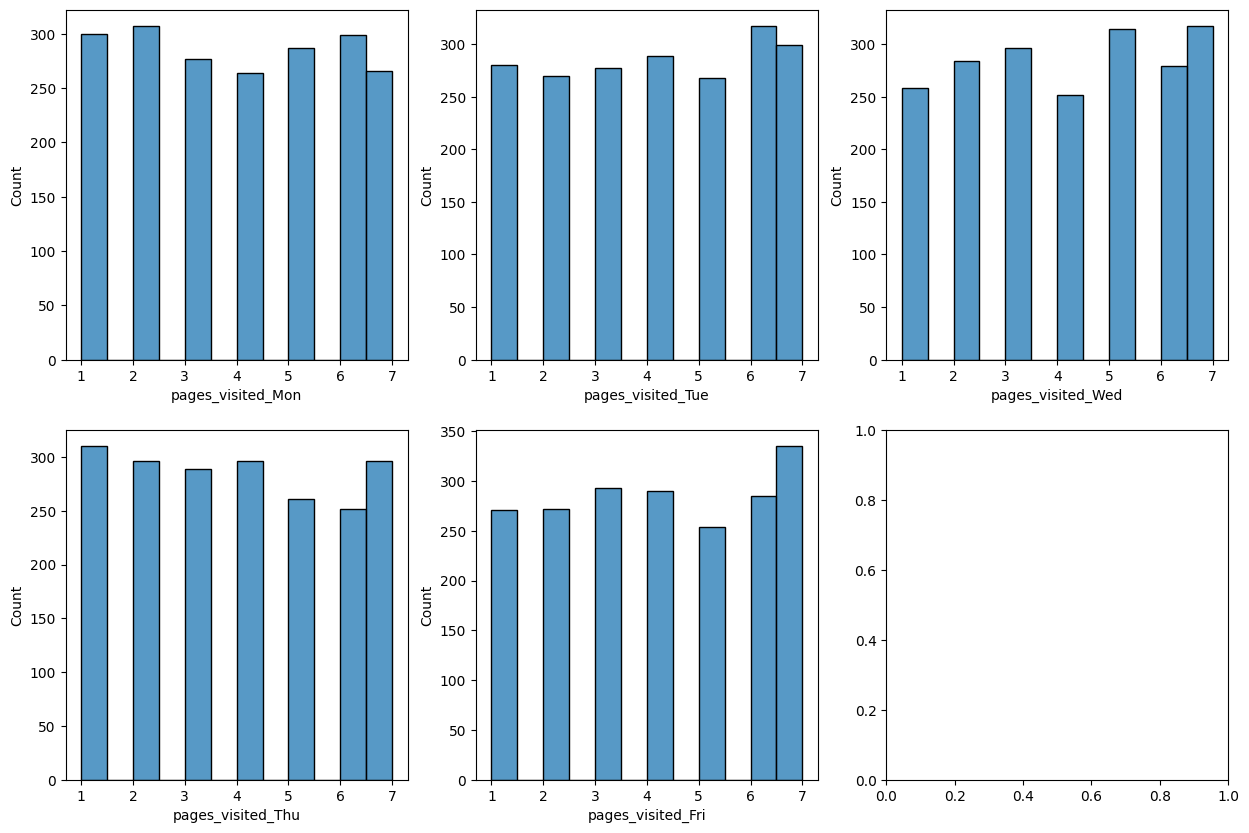

In [40]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.histplot(df2['pages_visited_Mon'], ax = axs[0,0])
plt2 = sns.histplot(df2['pages_visited_Tue'], ax = axs[0,1])
plt3 = sns.histplot(df2['pages_visited_Wed'], ax = axs[0,2])
plt4 = sns.histplot(df2['pages_visited_Thu'], ax = axs[1,0])
plt5 = sns.histplot(df2['pages_visited_Fri'], ax = axs[1,1])

<Axes: xlabel='converted_Fri', ylabel='avg_rating_Fri'>

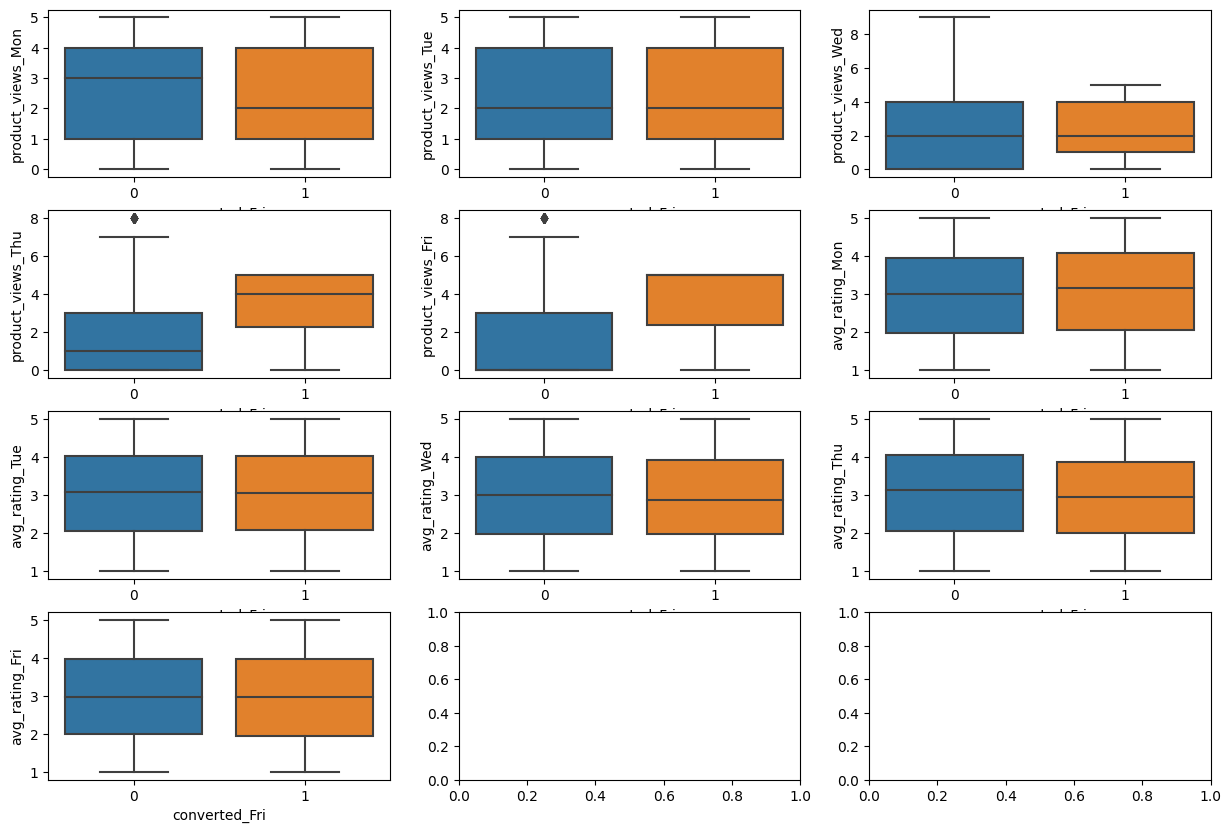

In [41]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
sns.boxplot(y = 'product_views_Mon', x = 'converted_Fri', data = df2, ax = axs[0,0])
sns.boxplot(y = 'product_views_Tue', x = 'converted_Fri', data = df2, ax = axs[0,1])
sns.boxplot(y = 'product_views_Wed', x = 'converted_Fri', data = df2, ax = axs[0,2])
sns.boxplot(y = 'product_views_Thu', x = 'converted_Fri', data = df2, ax = axs[1,0])
sns.boxplot(y = 'product_views_Fri', x = 'converted_Fri', data = df2, ax = axs[1,1])
sns.boxplot(y = 'avg_rating_Mon', x = 'converted_Fri', data = df2, ax = axs[1,2])
sns.boxplot(y = 'avg_rating_Tue', x = 'converted_Fri', data = df2, ax = axs[2,0])
sns.boxplot(y = 'avg_rating_Wed', x = 'converted_Fri', data = df2, ax = axs[2,1])
sns.boxplot(y = 'avg_rating_Thu', x = 'converted_Fri', data = df2, ax = axs[2,2])
sns.boxplot(y = 'avg_rating_Fri', x = 'converted_Fri', data = df2, ax = axs[3,0])

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Fri'>

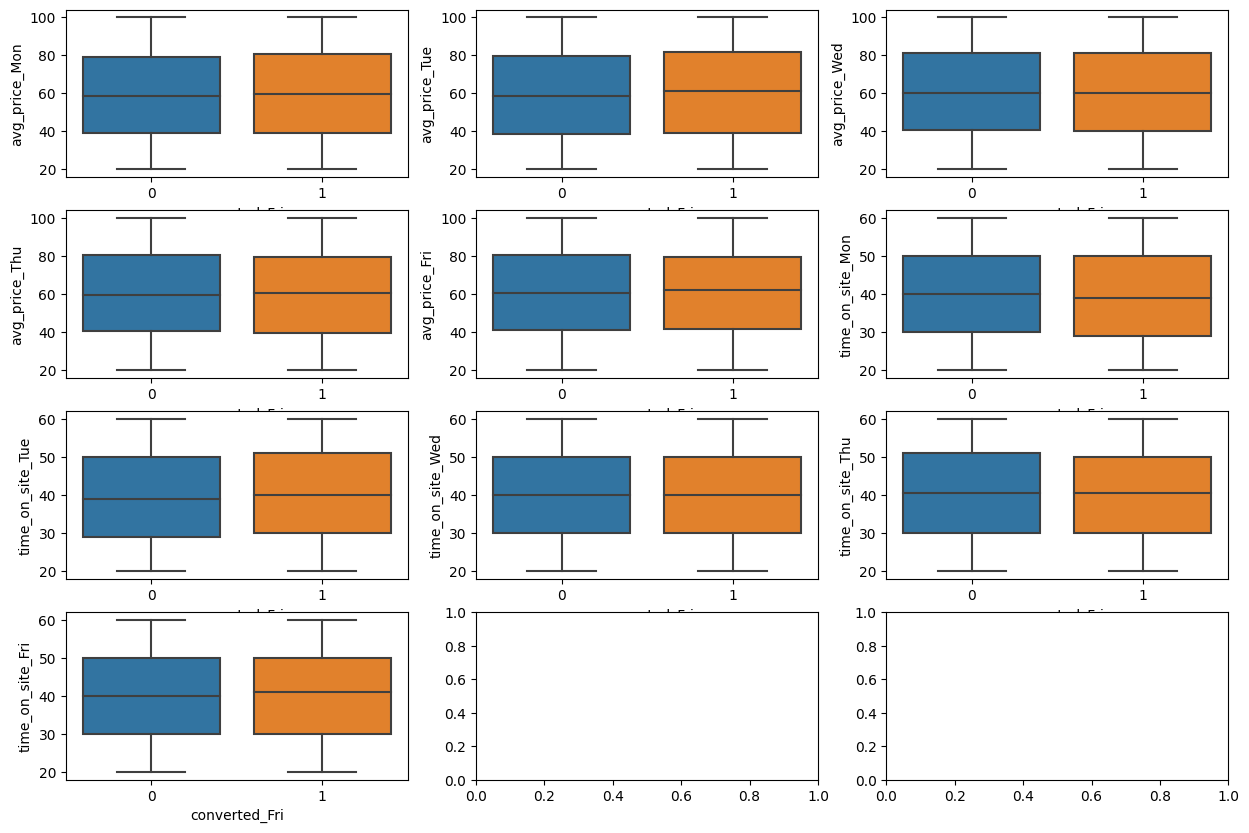

In [42]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
sns.boxplot(y = 'avg_price_Mon', x = 'converted_Fri', data = df2, ax = axs[0,0])
sns.boxplot(y = 'avg_price_Tue', x = 'converted_Fri', data = df2, ax = axs[0,1])
sns.boxplot(y = 'avg_price_Wed', x = 'converted_Fri', data = df2, ax = axs[0,2])
sns.boxplot(y = 'avg_price_Thu', x = 'converted_Fri', data = df2, ax = axs[1,0])
sns.boxplot(y = 'avg_price_Fri', x = 'converted_Fri', data = df2, ax = axs[1,1])
sns.boxplot(y = 'time_on_site_Mon', x = 'converted_Fri', data = df2, ax = axs[1,2])
sns.boxplot(y = 'time_on_site_Tue', x = 'converted_Fri', data = df2, ax = axs[2,0])
sns.boxplot(y = 'time_on_site_Wed', x = 'converted_Fri', data = df2, ax = axs[2,1])
sns.boxplot(y = 'time_on_site_Thu', x = 'converted_Fri', data = df2, ax = axs[2,2])
sns.boxplot(y = 'time_on_site_Fri', x = 'converted_Fri', data = df2, ax = axs[3,0])

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Fri'>

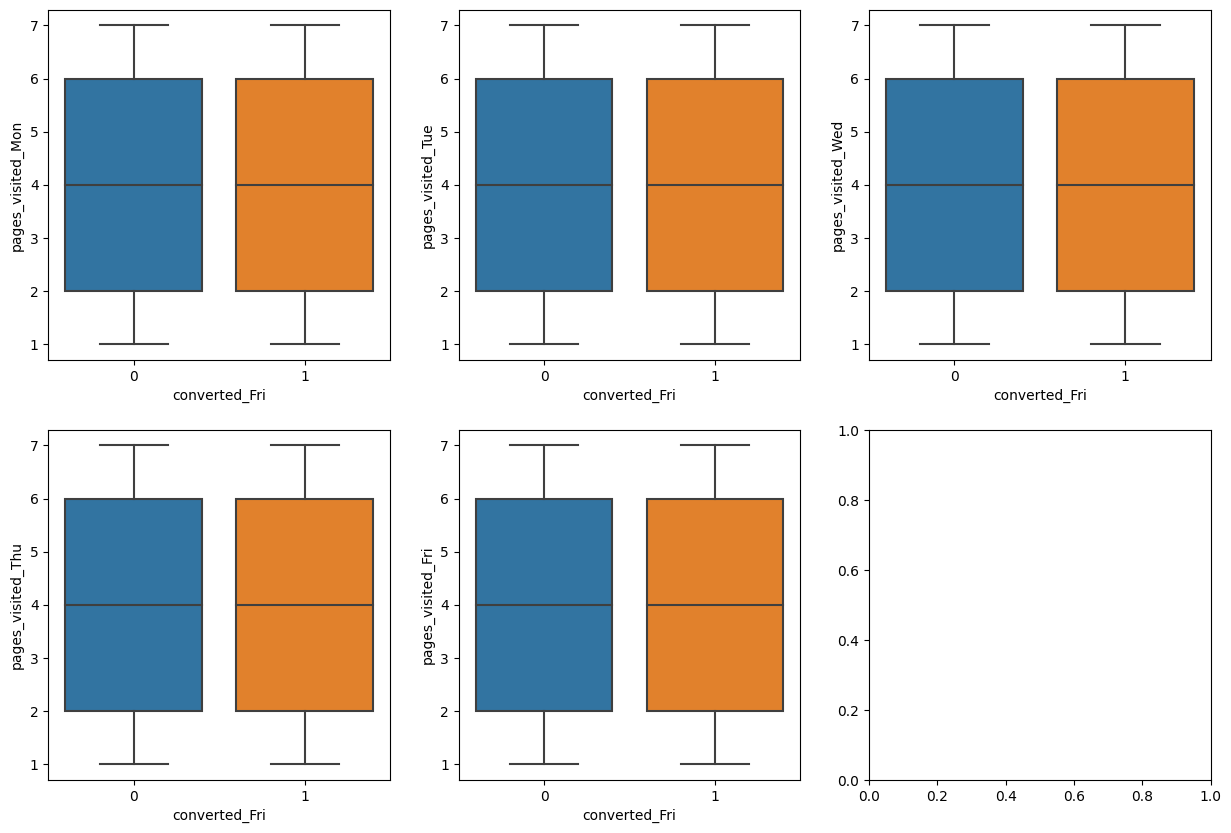

In [43]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
sns.boxplot(y = 'pages_visited_Mon', x = 'converted_Fri', data = df2, ax = axs[0,0])
sns.boxplot(y = 'pages_visited_Tue', x = 'converted_Fri', data = df2, ax = axs[0,1])
sns.boxplot(y = 'pages_visited_Wed', x = 'converted_Fri', data = df2, ax = axs[0,2])
sns.boxplot(y = 'pages_visited_Thu', x = 'converted_Fri', data = df2, ax = axs[1,0])
sns.boxplot(y = 'pages_visited_Fri', x = 'converted_Fri', data = df2, ax = axs[1,1])

In [51]:
df2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitor_id,2000.0,NaN,NaN,NaN,1000.5,577.494589,1.0,500.75,1000.5,1500.25,2000.0
visitor_location,2000,5,South America,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marketing_channel,2000,5,instagram,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2000,2,F,1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_views_Mon,2000.0,NaN,NaN,NaN,2.5415,1.704914,0.0,1.0,3.0,4.0,5.0
product_views_Tue,2000.0,NaN,NaN,NaN,2.4405,1.715206,0.0,1.0,2.0,4.0,5.0
product_views_Wed,2000.0,NaN,NaN,NaN,2.441,2.343345,0.0,0.0,2.0,4.0,9.0
product_views_Thu,2000.0,NaN,NaN,NaN,2.440286,2.18825,0.0,0.0,2.0,5.0,8.0
product_views_Fri,2000.0,NaN,NaN,NaN,2.47312,2.224386,0.0,0.0,2.0,5.0,8.0
avg_rating_Mon,2000.0,NaN,NaN,NaN,3.02399,1.151037,1.0,2.0175,3.055,4.0225,5.0


In [52]:
df2.groupby(['converted_Fri', 'visitor_location'])['visitor_id'].count().unstack()

visitor_location,Asia,Australia,Europe,North America,South America
converted_Fri,,,,,
0,231,268,235,267,255
1,138,135,148,145,178


In [53]:
df2.groupby(['converted_Fri', 'marketing_channel'])['visitor_id'].count().unstack()

marketing_channel,facebook,google,instagram,organic,youtube
converted_Fri,,,,,
0,238,234,257,311,216
1,156,165,174,96,153


In [54]:
df2.groupby(['converted_Fri', 'gender'])['visitor_id'].count().unstack()

gender,F,M
converted_Fri,,
0,602,654
1,491,253
